#What is Naive Bayes?
- supervised learning classfication algorithm, which is based on Bayes theorem and used for solving classification problem.
- It predicts the category or class of data based on probabilities.
- Its called **'naive'** because it assumes that all features(inputs) are independent of each other, which is rarely true in real life.

---

#What is it used for?
- Text classification(spam vs not spam)
- Email Filtering
- Medical Diagnosis(flu or no flu)
- Sentiment Analysis

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [228]:
df = pd.read_csv('/content/heart.csv')

In [229]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA- Exploratory Data Analysis

In [230]:
# 1.null
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [231]:
# if there were null values.
# df.dropna(inplace=True)

In [232]:
# 2. Duplicate
df.duplicated().sum()

np.int64(1)

In [233]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [234]:
df.drop_duplicates(inplace=True)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


#Outlier : we will avoid it here

In [236]:
Corr = df.corr()
Corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


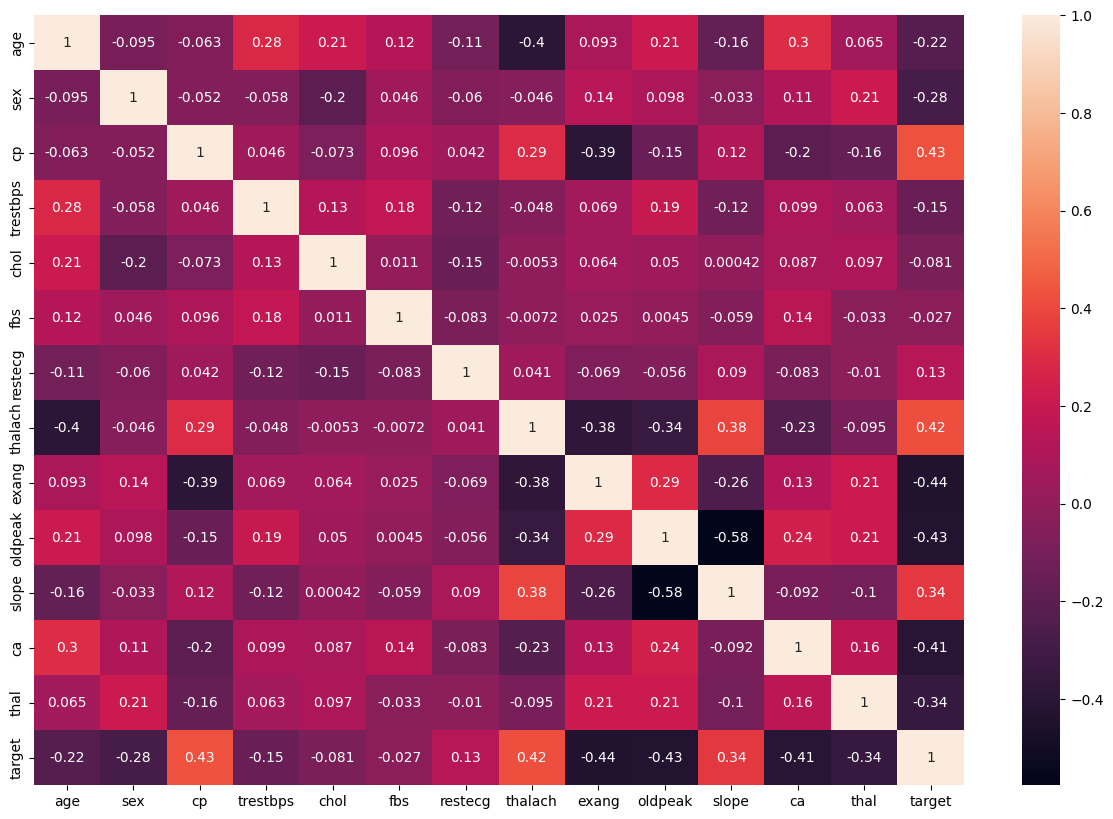

In [237]:
plt.figure(figsize=(15,10))
map = sns.heatmap(Corr, annot=True)

#TYPES OF NAIVE BAYES:
1. Gaussian Naive Bayes
  - For continuous numeric data
  - assume features follow a normal/gaussian distribution.
  - **Example** : Predicting disease on: BP, Body Temperature, Heart Rate

2. Multinomial Naive Bayes
  - For count data(discrete values)
  - Perfect for NLP tasks
  - Often used for text classification
  - **Example** : Spam Detection: counting words like "free", "win", "disappear"

3. Bernoulli Naive Bayes
  - For binary/boolean features(0 or 1)
  - Features are present/absent, yes/no, true/false
  - works with text data, but works on whether the word appears or not
  - **Example** : Spam detection: whether mail has win or not

4. Categorical Naive Bayes
  - Categorical features(non-numeric, non-ordered categories)
  - **Example**: Predicting pet insurance claim:
      - Animal type = cat/dog
      - Breed = Labrador/ Husky
      - Indoor/Outdoor = Yes/ No

## **Model Building**

In [238]:
X = df.drop('target', axis=1)
y = df['target']

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [241]:
from sklearn.naive_bayes import *
from sklearn.metrics import *

## **Gaussian**

In [242]:
model_1 = GaussianNB()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

In [243]:
confusion_matrix(y_test,y_pred_1)

array([[27,  2],
       [ 5, 27]])

In [244]:
Precision =  27/(27+5)
print(f'Precision = {Precision}')

Precision = 0.84375


In [245]:
Recall = 27/(27+2)
print(f'Recall = {Recall}')

Recall = 0.9310344827586207


In [246]:
acc = accuracy_score(y_test, y_pred_1)*100
print(f'Accuracy Score = {acc}')

Accuracy Score = 88.52459016393442


## **Multinomial**

In [247]:
model_2 = MultinomialNB()
model_2.fit(X_train,y_train)
y_pred_2 = model_2.predict(X_test)

In [248]:
confusion_matrix(y_test,y_pred_2)

array([[24,  5],
       [ 6, 26]])

In [249]:
Precision =  24/(24+6)
print(f'Precision = {Precision}')

Precision = 0.8


In [250]:
Recall = 24/(24+5)
print(f'Recall = {Recall}')

Recall = 0.8275862068965517


In [251]:
acc_2 = accuracy_score(y_test, y_pred_2)*100
print(f'Accuracy Score = {acc_2}')

Accuracy Score = 81.9672131147541


##**Bernoulli**


In [252]:
model_3 = BernoulliNB()
model_3.fit(X_train,y_train)
y_pred_3=model_3.predict(X_test)

In [253]:
confusion_matrix(y_test,y_pred_3)

array([[25,  4],
       [ 4, 28]])

In [254]:
Precision =  25/(25+4)
print(f'Precision = {Precision}')

Precision = 0.8620689655172413


In [255]:
Recall = 25/(25+4)
print(f'Recall = {Recall}')

Recall = 0.8620689655172413


In [256]:
acc_3 = accuracy_score(y_test, y_pred_3)*100
print(f'Accuracy Score = {acc_3}')

Accuracy Score = 86.88524590163934


##**Categorical**


In [257]:
model_4 = CategoricalNB()
model_4.fit(X_train,y_train)
y_pred_4=model_4.predict(X_test)

In [258]:
confusion_matrix(y_test, y_pred_4)

array([[24,  5],
       [ 4, 28]])

In [259]:
Precision =  24/(24+4)
print(f'Precision = {Precision}')

Precision = 0.8571428571428571


In [260]:
Recall = 24/(24+5)
print(f'Recall = {Recall}')

Recall = 0.8275862068965517


In [261]:
acc_4 = accuracy_score(y_test, y_pred_4)*100
print(f'Accuracy Score = {acc_4}')

Accuracy Score = 85.24590163934425


####**Gaussian** performs the best out of all the other Navie Bayes Models with the Accuracy Score of 88.524